In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('data/winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [5]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [7]:
import sweetviz as sv

In [8]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


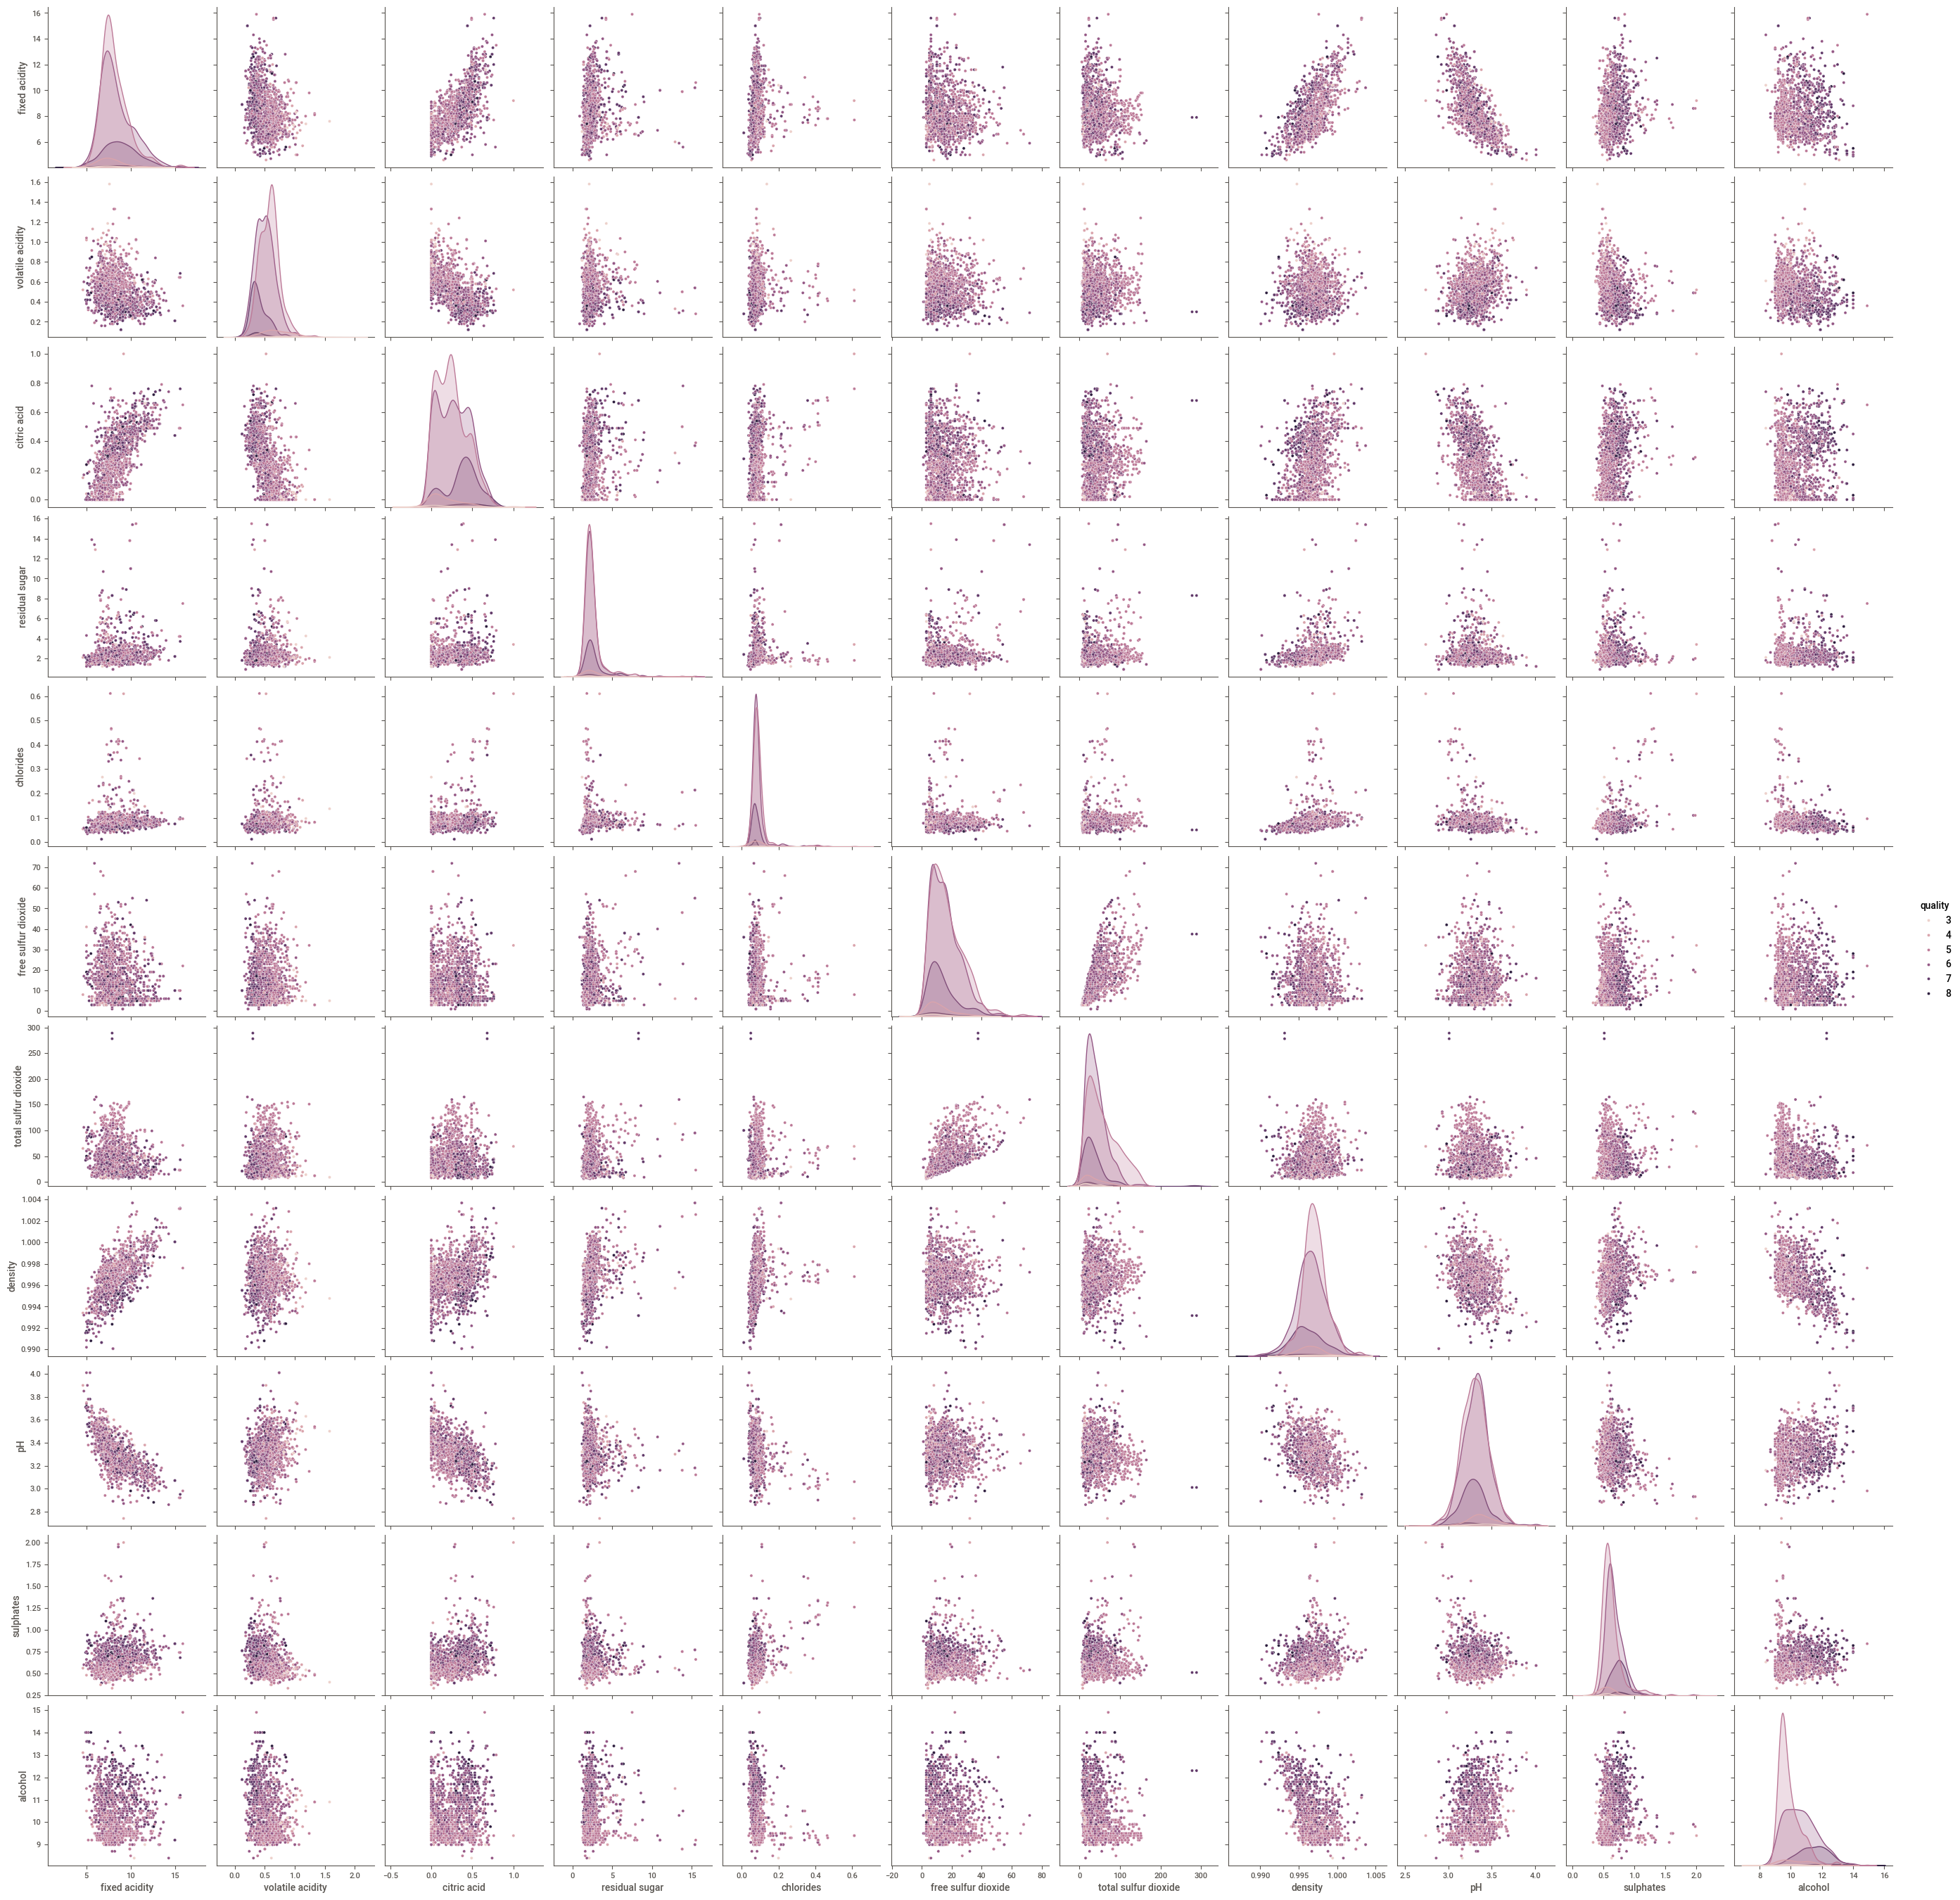

In [9]:
sns.pairplot(df,hue='quality')

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df2=df.drop('quality',axis=1)

In [12]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
from scipy.stats import zscore

In [14]:
df_scaled=df2.apply(zscore)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [15]:
model=KMeans(n_clusters=2)

In [16]:
model

KMeans(n_clusters=2)

In [17]:
cluster_range=range(1,15)
cluster_error=[]
for a in cluster_range:
    cluster=KMeans(a,n_init=10)
    cluster.fit(df_scaled)
    cluster_error.append(cluster.inertia_)
cluster_df=pd.DataFrame({'num_cluster':cluster_range,'cluster_error':cluster_error})
cluster_df

,num_cluster,cluster_error
0,1,17589.000000
1,2,14330.142460
2,3,12629.974592
3,4,11294.210161
4,5,10155.402298
5,6,9363.966296
6,7,8644.749285
7,8,8304.923891
8,9,7970.219877
9,10,7669.951827


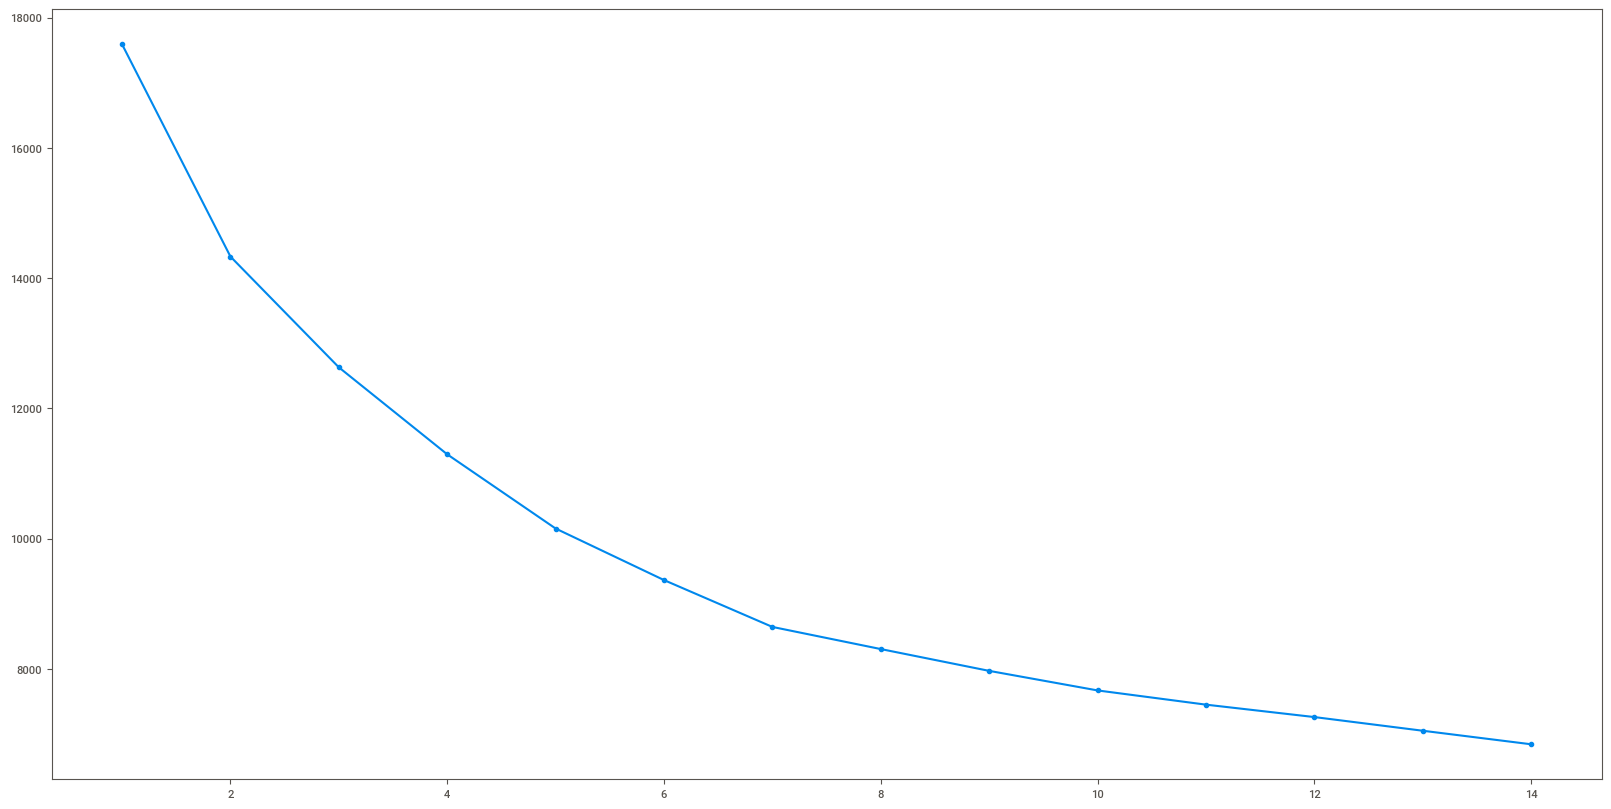

In [18]:
plt.figure(figsize=(20,10))
plt.plot(cluster_df['num_cluster'],cluster_df['cluster_error'],marker='o')

In [19]:
kmeans=KMeans(n_clusters=7,n_init=15,random_state=3)

In [20]:
kmeans.fit(df_scaled)

KMeans(n_clusters=7, n_init=15, random_state=3)

In [21]:
centroids=kmeans.cluster_centers_
pd.DataFrame(centroids,columns=df2.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.663594,-0.602868,1.238530,0.141880,0.026854,-0.526189,-0.466775,1.097941,-1.007436,0.281532,0.018281
1,-0.412873,0.638707,-0.786989,-0.204471,-0.034905,-0.481745,-0.407084,0.025488,0.317275,-0.399664,-0.519196
2,-1.112071,0.426554,-0.933024,-0.237084,-0.422610,0.284558,-0.158589,-1.353682,1.212829,-0.137825,1.209668
3,0.068922,-1.020540,0.711021,-0.172691,-0.273122,-0.290232,-0.521933,-0.634935,-0.130578,0.443844,0.974170
4,-0.102693,0.047445,0.059370,-0.014083,-0.034532,1.003238,1.234540,0.218749,-0.104692,-0.185669,-0.565070
5,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913
6,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731


In [22]:
df_scaled['class']=kmeans.labels_.astype('object')

In [23]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,1
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,1
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1


In [24]:
df_k=df_scaled

In [25]:
df_k['class']=df_k['class'].astype('object')

In [26]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

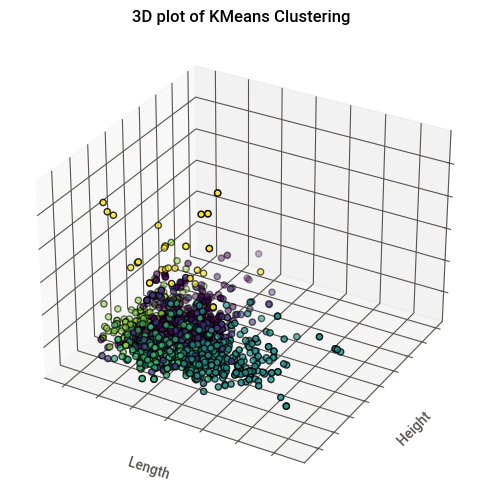

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3], c=labels.astype(float), edgecolor='k')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

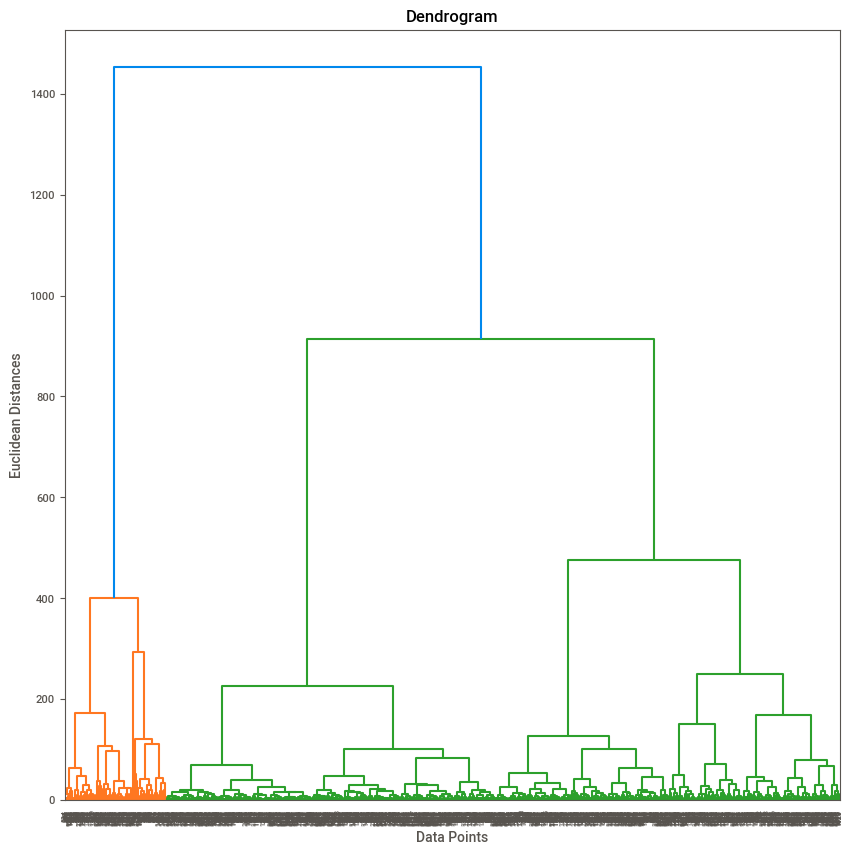

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df2, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
cluster2 = hie_clus.fit_predict(df_scaled)

df_h = df_scaled.copy(deep=True)
df_h['class'] = cluster2

In [35]:
df_h

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,1
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,1
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,1
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,1
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,1
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,1


In [36]:
df_h['class']=df_h['class'].astype('object')

In [37]:
print('Original Data Classes:')
print(df['quality'].value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k['class'].value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h['class'].value_counts())

Original Data Classes:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
------------------------------
K-Means Predicted Data Classes:
class
1    495
4    335
0    263
3    250
2    194
5     34
6     28
Name: count, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
class
1    688
0    646
2    265
Name: count, dtype: int64


In [38]:
x= df_k.drop('class',axis=1)
y= pd.DataFrame(df_k['class'].astype('float64'))

In [39]:
test_size = 0.30
seed = 7
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [40]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train)
x_validate = independent_scalar.transform (x_validate)

In [41]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   1599 non-null   float64
dtypes: float64(1)
memory usage: 12.6 KB


In [42]:
from sklearn.tree import DecisionTreeClassifier 
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [43]:
predictValues_train = Dtree.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
predictValues_validate = Dtree.predict(x_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.7926720285969616
Validation Accuracy  ::  0.7666666666666667


In [45]:
from sklearn.metrics import classification_report, precision_score, f1_score
print('Classification Report')
print(classification_report(y_validate, predictValues_validate, zero_division=1))

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.82        91
         1.0       0.78      0.87      0.82       129
         2.0       0.96      0.78      0.86        60
         3.0       0.65      0.73      0.69        85
         4.0       0.68      0.77      0.72       100
         5.0       1.00      0.00      0.00         9
         6.0       1.00      0.00      0.00         6

    accuracy                           0.77       480
   macro avg       0.85      0.56      0.56       480
weighted avg       0.79      0.77      0.76       480



In [47]:
from sklearn.ensemble import RandomForestClassifier
y_train_1d = y_train.values.ravel()
RFclassifier = RandomForestClassifier(n_estimators=100, random_state=0, min_samples_split=5, criterion='gini', max_depth=5)
RFclassifier.fit(x_train, y_train_1d)

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=0)

In [48]:
predictValues_validate = RFclassifier.predict(x_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
predictValues_train = RFclassifier.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9472743521000894
Validation Accuracy  ::  0.8916666666666667


In [49]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93        91
         1.0       0.85      0.92      0.88       129
         2.0       0.95      0.92      0.93        60
         3.0       0.92      0.79      0.85        85
         4.0       0.85      0.93      0.89       100
         5.0       1.00      0.56      0.71         9
         6.0       1.00      0.83      0.91         6

    accuracy                           0.89       480
   macro avg       0.93      0.84      0.87       480
weighted avg       0.90      0.89      0.89       480



In [50]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [52]:
from sklearn.neighbors import KNeighborsClassifier

y_train_1d = y_train.values.ravel()

KNN = KNeighborsClassifier(n_neighbors=8, weights='uniform', metric='euclidean')
KNN.fit(x_train, y_train_1d)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [53]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[3. 4. 4. ... 1. 0. 1.]
Train Accuracy  ::  0.9588918677390528


In [54]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1. 0. 3. 1. 2. 1. 2. 0. 1. 4. 3. 3. 0. 1. 1. 4. 3. 1. 1. 2. 1. 4. 1. 1.
 4. 0. 1. 4. 0. 1. 0. 4. 2. 1. 4. 4. 3. 1. 0. 4. 4. 0. 3. 2. 1. 2. 4. 2.
 3. 3. 3. 1. 0. 3. 1. 3. 0. 2. 2. 3. 1. 3. 2. 1. 4. 4. 1. 2. 2. 1. 3. 0.
 0. 0. 4. 0. 4. 0. 1. 3. 2. 3. 4. 1. 1. 3. 4. 1. 3. 1. 2. 1. 1. 4. 2. 1.
 0. 1. 3. 0. 1. 1. 1. 4. 1. 0. 2. 1. 2. 0. 2. 4. 2. 2. 4. 1. 4. 4. 2. 1.
 1. 1. 1. 2. 3. 0. 1. 0. 3. 0. 0. 1. 3. 4. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 4. 4. 0. 1. 3. 1. 4. 1. 4. 0. 1. 4. 0. 0. 0. 1. 1. 4. 4.
 2. 6. 4. 0. 4. 0. 0. 1. 0. 0. 3. 1. 2. 2. 0. 0. 4. 2. 0. 4. 1. 3. 4. 2.
 1. 4. 1. 4. 1. 3. 3. 3. 4. 0. 5. 3. 0. 0. 3. 4. 3. 0. 0. 2. 1. 4. 4. 1.
 1. 0. 1. 2. 4. 0. 1. 2. 4. 3. 4. 3. 1. 1. 4. 1. 3. 0. 3. 4. 0. 3. 1. 1.
 4. 1. 1. 4. 4. 1. 0. 1. 1. 0. 1. 4. 3. 3. 3. 2. 1. 3. 1. 5. 0. 4. 3. 0.
 1. 4. 1. 1. 1. 4. 3. 4. 3. 0. 4. 0. 4. 4. 0. 3. 3. 0. 2. 0. 0. 2. 0. 5.
 0. 3. 4. 3. 1. 2. 4. 0. 4. 1. 1. 0. 4. 2. 3. 0. 2. 0. 1. 2. 2. 4. 1. 3.
 0. 3. 1. 1. 2. 1. 4. 0. 0. 4. 1. 6. 0. 4. 4. 2. 1.

In [55]:
x= df_h.drop('class',axis=1)
y= pd.DataFrame(df_h['class'].astype('float64'))

In [56]:
test_size = 0.30 
seed = 7
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [57]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train)
x_validate = independent_scalar.transform (x_validate)

In [58]:
from sklearn.tree import DecisionTreeClassifier 
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [59]:
predictValues_train = Dtree.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)

predictValues_validate = Dtree.predict(x_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.8579088471849866
Validation Accuracy  ::  0.8270833333333333


In [60]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.81       199
         1.0       0.90      0.82      0.86       190
         2.0       0.88      0.77      0.82        91

    accuracy                           0.83       480
   macro avg       0.84      0.82      0.83       480
weighted avg       0.84      0.83      0.83       480



In [62]:
from sklearn.ensemble import RandomForestClassifier
y_train_1d = y_train.values.ravel()

RFclassifier = RandomForestClassifier(n_estimators=100, random_state=0, min_samples_split=5, criterion='gini', max_depth=5)
RFclassifier.fit(x_train, y_train_1d)

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=0)

In [63]:
predictValues_validate = RFclassifier.predict(x_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

predictValues_train = RFclassifier.predict(x_train)
accuracy_train=accuracy_score(y_train, predictValues_train)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9579982126899017
Validation Accuracy  ::  0.9166666666666666


In [65]:
from sklearn.ensemble import RandomForestClassifier
y_train_1d = y_train.values.ravel()
RFclassifier = RandomForestClassifier(n_estimators=11, random_state=0, min_samples_split=5, criterion='gini', max_depth=5)
RFclassifier.fit(x_train, y_train_1d)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=11,
                       random_state=0)

In [66]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       199
         1.0       0.94      0.94      0.94       190
         2.0       0.91      0.88      0.89        91

    accuracy                           0.92       480
   macro avg       0.92      0.91      0.91       480
weighted avg       0.92      0.92      0.92       480



In [68]:
from sklearn.neighbors import KNeighborsClassifier

y_train_1d = y_train.values.ravel()

KNN = KNeighborsClassifier(n_neighbors=8, weights='uniform', metric='euclidean')
KNN.fit(x_train, y_train_1d)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [69]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[0. 0. 0. ... 1. 2. 1.]
Train Accuracy  ::  0.9696157283288651


In [70]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1. 2. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 2. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 2. 1. 0. 2. 1. 2. 0. 1. 1. 0. 0. 0. 1. 2. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 2. 0. 1. 0. 2. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 2.
 2. 2. 0. 2. 0. 2. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 2. 1. 0. 2. 1. 1. 1. 0. 1. 2. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 2. 1. 2. 0. 2. 2. 1. 0. 0. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 0. 0. 2. 1. 0. 1. 0. 1. 0. 2. 1. 0. 2. 0. 2. 1. 1. 0. 0.
 1. 0. 0. 2. 0. 2. 2. 1. 2. 2. 0. 1. 1. 1. 2. 2. 0. 1. 2. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 2. 2. 1. 1. 0. 0. 1.
 1. 2. 1. 1. 0. 2. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 2. 0. 0. 2. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 2. 0. 1. 2. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 2. 0. 0. 2.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 2. 0. 2. 0. 0. 2. 0. 0. 2. 1. 2. 0. 1. 2. 0.
 2. 0. 0. 0. 1. 1. 0. 2. 0. 0. 1. 2. 0. 1. 0. 2. 1. 2. 1. 1. 1. 0. 1. 0.
 2. 0. 1. 1. 1. 1. 0. 2. 2. 0. 0. 0. 2. 0. 0. 1. 1.